# The Deep Learning Homework 2 - Question No. 3  
Bahar Mahdavi - SN: 40152521337

## Train the following neural networks on the IRIS dataset, with 100 iterations and the Ⅽross-Entropy loss function. Report the precision and error values for the training and test data for each iteration.

In [1]:
import warnings
warnings.filterwarnings("ignore")

Importing the IRES dataframe:

In [2]:
import pandas as pd #data loading and manipulation

csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class'] #using the attribute information as the column names
iris = pd.read_csv(csv_url, names = col_names)

In [3]:
iris.head() #The head() method from Pandas shows the first five rows of the dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.index

RangeIndex(start=0, stop=150, step=1)

In [5]:
iris.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Class            object
dtype: object

In [6]:
mappings = {
   'Iris-setosa': 0,
   'Iris-versicolor': 1,
   'Iris-virginica': 2
}
iris['Class'] = iris['Class'].apply(lambda x: mappings[x])
#torch tensors should be numeric, so we’ll have to encode the target variable (Class column)

In [7]:
iris

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Creating feature sets (X) and target variable (y):

In [8]:
X = iris.drop('Class', axis=1).values #iris features
y = iris['Class'].values #iris target

In [9]:
print(X.shape, y.shape)

(150, 4) (150,)


Splitting for train and test set (With the 80:20 split):

In [10]:
from sklearn.model_selection import train_test_split #sklearn package helps in splitting the data for train, validation and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 124) #splitting for train and validation set

Normalizing the data:

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Converting split data from Numpy arrays to PyTorch tensors:

In [12]:
import torch
torch.manual_seed(124)

X_train = torch.FloatTensor(X_train) #dtype=torch.float
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train) #dtype=torch.long
y_test = torch.LongTensor(y_test)

Checking how many records are there in each set by displaying its shape:

In [13]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

torch.Size([120, 4])

torch.Size([30, 4])

torch.Size([120])

torch.Size([30])

x_train has 120 rows and 4 columns, while x_test and validation set (x_val) both of them have 15 rows and 4 columns. Looking at y_train, y_test and y_val it is 120, 30, 15 records respectively

## 1. Creating a neural network model without hidden layers

### Choosing the SGD optimizer:

Defining a simple Neural Network Model (the perceptron model):

In [14]:
import torch.nn as nn
import torch.nn.functional as F

#defining the Hyper parameters
learning_rate = 0.01 #the standard learning rate value = 0.1 is adapted
learning_momentum = 0.9 #how fast you want the network to reach the minimum loss during the training process
epochs = 100 #this number denoted how many times you want the network to backpropagte and learn the data perfectly since there are only 150 rows 20 epochs worked fine but as question asking us, I chose it 100

class IrisANN1 (nn.Module): #defining the nodes, layers, activation functions
    def __init__(self):
        super(IrisANN1, self).__init__()
        self.linear = nn.Linear(in_features = 4, out_features = 3) #4 input features (since there are 4 physical parameters the number of nodes in the input layer will be 4) and one Output 
        
    def forward(self, X): #defining the forward class which depicts how the data flows in a forward path of a network
        out = self.linear(X)
        
        return torch.sigmoid(out)

model = IrisANN1() #Create the neural network model

In [15]:
class IrisNet1(nn.Module): 
    def __init__(self,input_size,output): 
        super(IrisNet1, self).__init__()
   
        self.fc1   = nn.Linear(input_size, output)    

    def forward(self, x): 
        out = self.fc1(x)
        
        return out

Choosing the loss function and optimizer:

In [16]:
criterion = nn.CrossEntropyLoss() #basically how we measure loss, we’ll use CrossEntropyLoss
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum = learning_momentum)

Training the model:

In [17]:
%%time
epochs = 100 #train the model for 100 epochs
loss_arr = []

for i in range(epochs):
    y_hat = model.forward(X_train)
    loss = criterion(y_hat, y_train)
    loss_arr.append(loss)
 
    if i % 10 == 0: 
        print(f'Epoch: {i} Loss: {loss}') #every 10 epochs we’ll output on which epoch are we and what’s the current loss
 
    optimizer.zero_grad() #backpropagation to updating of weights and biases in order to the model actually learn
    loss.backward()
    optimizer.step()
    
model.eval()

Epoch: 0 Loss: 1.1130679845809937
Epoch: 10 Loss: 1.0911153554916382
Epoch: 20 Loss: 1.0517007112503052
Epoch: 30 Loss: 1.0112653970718384
Epoch: 40 Loss: 0.9756056070327759
Epoch: 50 Loss: 0.9460235238075256
Epoch: 60 Loss: 0.9221143126487732
Epoch: 70 Loss: 0.9029256701469421
Epoch: 80 Loss: 0.8874469995498657
Epoch: 90 Loss: 0.874805212020874
Wall time: 35.1 ms


IrisANN1(
  (linear): Linear(in_features=4, out_features=3, bias=True)
)

A visualization of our loss by SGD optimizer:

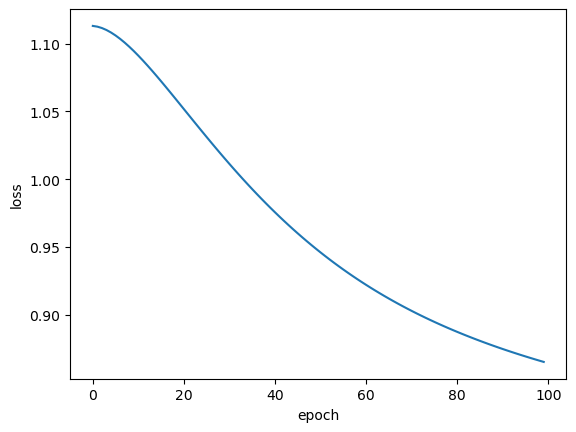

In [18]:
import matplotlib.pyplot as plt #python package to drew graphs in python

plt.plot([i for i in range(100)], [loss.detach().numpy() for loss in loss_arr])
plt.xlabel ('epoch')
plt.ylabel ('loss')
plt.show()

Evaluation the model:

In [19]:
preds = [] #predictions are stored in the preds array
with torch.no_grad(): #there’s no need to update weights and biases
    for val in X_test:
        y_hat = model.forward(val)
        preds.append(y_hat.argmax().item())

In [20]:
df = pd.DataFrame({'Y': y_test, 'YHat': preds}) #Y: actual value and YHat: predicted value
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]

In [21]:
df

,Y,YHat,Correct
0,1,2,0
1,0,0,1
2,1,1,1
3,2,1,0
4,2,2,1
5,1,1,1
6,1,1,1
7,0,0,1
8,2,2,1
9,1,1,1


In [22]:
df['Correct'].sum() / len(df) #sum up the Correct column and divide it with the length of df

0.7666666666666667

In [23]:
#another way
acc = len([1 for i in range(X_test.shape[0]) if preds[i] == y_test[i]]) / X_test.shape[0]
print("accuracy for test set is:{}".format(acc))

accuracy for test set is:0.7666666666666667


### Choosing Adam optimizer:

Defining a simple Neural Network Model (the perceptron model):

In [24]:
import torch.nn as nn
import torch.nn.functional as F

#defining the Hyper parameters
learning_rate = 0.01 #the standard learning rate value = 0.1 is adapted
learning_momentum = 0.9 #how fast you want the network to reach the minimum loss during the training process
epochs = 100 #this number denoted how many times you want the network to backpropagte and learn the data perfectly since there are only 150 rows 20 epochs worked fine but as question asking us, I chose it 100

class IrisANN1 (nn.Module): #defining the nodes, layers, activation functions
    def __init__(self):
        super(IrisANN1, self).__init__()
        self.linear = nn.Linear(in_features = 4, out_features = 3) #4 input features (since there are 4 physical parameters the number of nodes in the input layer will be 4) and one Output 
        
    def forward(self, X): #defining the forward class which depicts how the data flows in a forward path of a network
        out = self.linear(X)
        
        return torch.sigmoid(out)

model = IrisANN1() #Create the neural network model

Choosing the loss function and optimizer:

In [25]:
criterion = nn.CrossEntropyLoss() #basically how we measure loss, we’ll use CrossEntropyLoss
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate) #optimizer - Adam is used

Training the model:

In [26]:
%%time
epochs = 100 #train the model for 100 epochs
loss_arr = []

for i in range(epochs):
    y_hat = model.forward(X_train)
    loss = criterion(y_hat, y_train)
    loss_arr.append(loss)
 
    if i % 10 == 0: 
        print(f'Epoch: {i} Loss: {loss}') #every 10 epochs we’ll output on which epoch are we and what’s the current loss
 
    optimizer.zero_grad() #backpropagation to updating of weights and biases in order to the model actually learn
    loss.backward()
    optimizer.step()
    
model.eval()

Epoch: 0 Loss: 1.139886736869812
Epoch: 10 Loss: 1.0672699213027954
Epoch: 20 Loss: 1.0029655694961548
Epoch: 30 Loss: 0.9499607086181641
Epoch: 40 Loss: 0.9092450737953186
Epoch: 50 Loss: 0.878618061542511
Epoch: 60 Loss: 0.8551142811775208
Epoch: 70 Loss: 0.8366459012031555
Epoch: 80 Loss: 0.8217170238494873
Epoch: 90 Loss: 0.8093350529670715
Wall time: 37.5 ms


IrisANN1(
  (linear): Linear(in_features=4, out_features=3, bias=True)
)

A visualization of our loss by Adam optimizer:

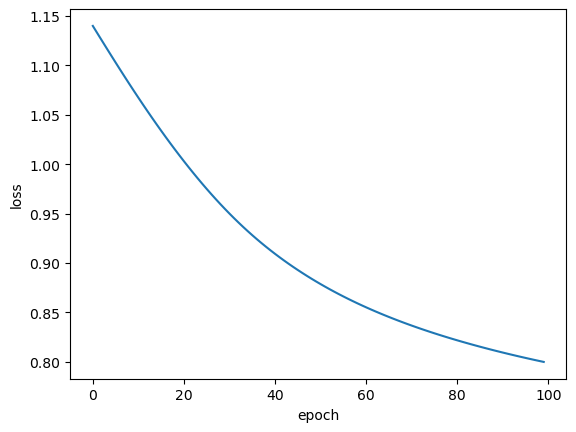

In [27]:
import matplotlib.pyplot as plt #python package to drew graphs in python

plt.plot([i for i in range(100)], [loss.detach().numpy() for loss in loss_arr])
plt.xlabel ('epoch')
plt.ylabel ('loss')
plt.show()

Evaluation the model:

In [28]:
preds = [] #predictions are stored in the preds array
with torch.no_grad(): #there’s no need to update weights and biases
    for val in X_test:
        y_hat = model.forward(val)
        preds.append(y_hat.argmax().item())

In [29]:
df = pd.DataFrame({'Y': y_test, 'YHat': preds}) #Y: actual value and YHat: predicted value
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]

In [30]:
df

,Y,YHat,Correct
0,1,1,1
1,0,0,1
2,1,1,1
3,2,1,0
4,2,1,0
5,1,1,1
6,1,1,1
7,0,0,1
8,2,1,0
9,1,1,1


In [31]:
df['Correct'].sum() / len(df) #sum up the Correct column and divide it with the length of df

0.6666666666666666

In [32]:
#another way
acc = len([1 for i in range(X_test.shape[0]) if preds[i] == y_test[i]]) / X_test.shape[0]
print("accuracy for test set is:{}".format(acc))

accuracy for test set is:0.6666666666666666


## 2. Creating a neural network model with three hidden layers and 24 neurons per layer with linear activation function

### Choosing the SGD optimizer:

Defining the Deep Neural Network Model:

In [33]:
import torch.nn as nn
import torch.nn.functional as F

#defining the Hyper parameters
learning_rate = 0.01 #the standard learning rate value = 0.1 is adapted
learning_momentum = 0.9 #how fast you want the network to reach the minimum loss during the training process
epochs = 100 #this number denoted how many times you want the network to backpropagte and learn the data perfectly since there are only 150 rows 20 epochs worked fine but as question asking us, I chose it 100

class IrisANN2 (nn.Module): #defining the nodes, layers, activation functions

    def __init__(self): 
        super (IrisANN2, self).__init__()
        
        self.input = nn.Linear(in_features = 4, out_features = 24) #Fully Connected Layer (4 input features (since there are 4 physical parameters the number of nodes in the input layer will be 4), 24 output features (the first hidden layer has 24 nodes as question asking us))
        self.fc1 = nn.Linear(in_features = 24, out_features = 24) #Fully Connected Layer (24 input features (number of output features from the previous layer), 24 output features (the second hidden layer has 24 nodes as question asking us)))
        self.fc2 = nn.Linear(in_features = 24, out_features = 24)
        self.output = nn.Linear(in_features = 24, out_features = 3) #Output Layer (24 input features (number of output features from the previous layer), 3 output features (since there are 3 class of species to be predicted the output is 3))
        self.activation = nn.Identity() #define the neural network model with the nn.Identity() activation function, which is equivalent to a linear activation function.
        
    def forward(self, X): #defining the forward class which depicts how the data flows in a forward path of a network
        out = self.activation(self.input(X)) 
        out = self.activation(self.fc1(out))
        out = self.activation(self.fc2(out))
        out = self.output(out)
        
        return out
    
model = IrisANN2() #Create the neural network model

Choosing the loss function and optimizer:

In [34]:
criterion = nn.CrossEntropyLoss() #basically how we measure loss, we’ll use CrossEntropyLoss
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum = learning_momentum) #optimizer - Stochastic Gradient Descent is used

Training the model:

In [35]:
%%time
epochs = 100 #train the model for 100 epochs
loss_arr = []

for i in range(epochs):
    y_hat = model.forward(X_train)
    loss = criterion(y_hat, y_train)
    loss_arr.append(loss)
 
    if i % 10 == 0: 
        print(f'Epoch: {i} Loss: {loss}') #every 10 epochs we’ll output on which epoch are we and what’s the current loss
 
    optimizer.zero_grad() #backpropagation to updating of weights and biases in order to the model actually learn
    loss.backward()
    optimizer.step()
    
model.eval()

Epoch: 0 Loss: 1.0806177854537964
Epoch: 10 Loss: 0.8063103556632996
Epoch: 20 Loss: 0.48513084650039673
Epoch: 30 Loss: 0.35678383708000183
Epoch: 40 Loss: 0.2807830572128296
Epoch: 50 Loss: 0.2350785732269287
Epoch: 60 Loss: 0.19955357909202576
Epoch: 70 Loss: 0.16564340889453888
Epoch: 80 Loss: 0.13351087272167206
Epoch: 90 Loss: 0.10608462244272232
Wall time: 47 ms


IrisANN2(
  (input): Linear(in_features=4, out_features=24, bias=True)
  (fc1): Linear(in_features=24, out_features=24, bias=True)
  (fc2): Linear(in_features=24, out_features=24, bias=True)
  (output): Linear(in_features=24, out_features=3, bias=True)
  (activation): Identity()
)

A visualization of our loss by SGD optimizer:

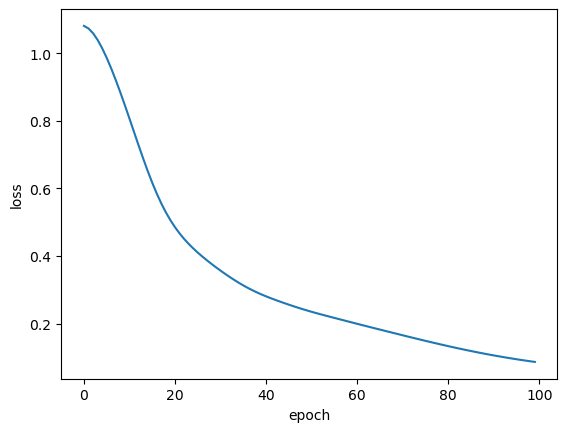

In [36]:
import matplotlib.pyplot as plt #python package to drew graphs in python

plt.plot([i for i in range(100)], [loss.detach().numpy() for loss in loss_arr])
plt.xlabel ('epoch')
plt.ylabel ('loss')
plt.show()

Evaluation the model:

In [37]:
preds = [] #predictions are stored in the preds array
with torch.no_grad(): #there’s no need to update weights and biases
    for val in X_test:
        y_hat = model.forward(val)
        preds.append(y_hat.argmax().item())

In [38]:
df = pd.DataFrame({'Y': y_test, 'YHat': preds}) #Y: actual value and YHat: predicted value
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]

In [39]:
df

,Y,YHat,Correct
0,1,1,1
1,0,0,1
2,1,1,1
3,2,2,1
4,2,2,1
5,1,2,0
6,1,1,1
7,0,0,1
8,2,2,1
9,1,1,1


In [40]:
df['Correct'].sum() / len(df) #sum up the Correct column and divide it with the length of df

0.9

In [41]:
#another way
acc = len([1 for i in range(X_test.shape[0]) if preds[i] == y_test[i]]) / X_test.shape[0]
print("accuracy for test set is:{}".format(acc))

accuracy for test set is:0.9


### Choosing Adam optimizer:

Defining the Deep Neural Network Model:

In [42]:
import torch.nn as nn
import torch.nn.functional as F

#defining the Hyper parameters
learning_rate = 0.01 #the standard learning rate value = 0.1 is adapted
learning_momentum = 0.9 #how fast you want the network to reach the minimum loss during the training process
epochs = 100 #this number denoted how many times you want the network to backpropagte and learn the data perfectly since there are only 150 rows 20 epochs worked fine but as question asking us, I chose it 100

class IrisANN2 (nn.Module): #defining the nodes, layers, activation functions

    def __init__(self): 
        super (IrisANN2, self).__init__()
        
        self.input = nn.Linear(in_features = 4, out_features = 24) #Fully Connected Layer (4 input features (since there are 4 physical parameters the number of nodes in the input layer will be 4), 24 output features (the first hidden layer has 24 nodes as question asking us))
        self.fc1 = nn.Linear(in_features = 24, out_features = 24) #Fully Connected Layer (24 input features (number of output features from the previous layer), 24 output features (the second hidden layer has 24 nodes as question asking us)))
        self.fc2 = nn.Linear(in_features = 24, out_features = 24)
        self.output = nn.Linear(in_features = 24, out_features = 3) #Output Layer (24 input features (number of output features from the previous layer), 3 output features (since there are 3 class of species to be predicted the output is 3))
        self.activation = nn.Identity() #define the neural network model with the nn.Identity() activation function, which is equivalent to a linear activation function.
        
    def forward(self, X): #defining the forward class which depicts how the data flows in a forward path of a network
        out = self.activation(self.input(X)) 
        out = self.activation(self.fc1(out))
        out = self.activation(self.fc2(out))
        out = self.output(out)
        
        return out
    
model = IrisANN2() #Create the neural network model

Choosing the loss function and optimizer:

In [43]:
criterion = nn.CrossEntropyLoss() #basically how we measure loss, we’ll use CrossEntropyLoss
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate) #optimizer - Adam is used

Training the model:

In [44]:
%%time
epochs = 100 #train the model for 100 epochs
loss_arr = []

for i in range(epochs):
    y_hat = model.forward(X_train)
    loss = criterion(y_hat, y_train)
    loss_arr.append(loss)
 
    if i % 10 == 0: 
        print(f'Epoch: {i} Loss: {loss}') #every 10 epochs we’ll output on which epoch are we and what’s the current loss
 
    optimizer.zero_grad() #backpropagation to updating of weights and biases in order to the model actually learn
    loss.backward()
    optimizer.step()
    
model.eval()

Epoch: 0 Loss: 1.1102420091629028
Epoch: 10 Loss: 0.23713721334934235
Epoch: 20 Loss: 0.06534051150083542
Epoch: 30 Loss: 0.017905881628394127
Epoch: 40 Loss: 0.009704900905489922
Epoch: 50 Loss: 0.007086289580911398
Epoch: 60 Loss: 0.004934858996421099
Epoch: 70 Loss: 0.003734802594408393
Epoch: 80 Loss: 0.0029230150394141674
Epoch: 90 Loss: 0.002328392816707492
Wall time: 75.5 ms


IrisANN2(
  (input): Linear(in_features=4, out_features=24, bias=True)
  (fc1): Linear(in_features=24, out_features=24, bias=True)
  (fc2): Linear(in_features=24, out_features=24, bias=True)
  (output): Linear(in_features=24, out_features=3, bias=True)
  (activation): Identity()
)

A visualization of our loss by Adam optimizer:

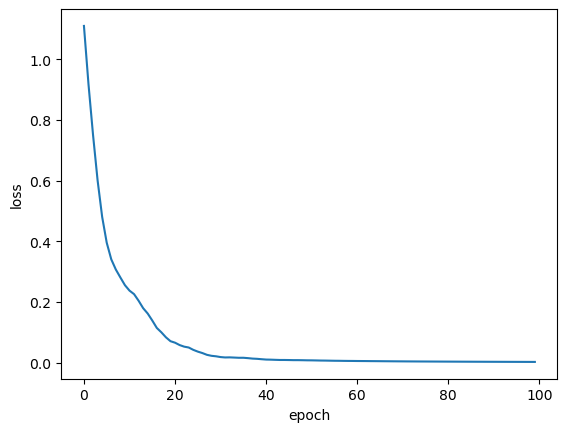

In [45]:
import matplotlib.pyplot as plt #python package to drew graphs in python

plt.plot([i for i in range(100)], [loss.detach().numpy() for loss in loss_arr])
plt.xlabel ('epoch')
plt.ylabel ('loss')
plt.show()

Evaluation the model:

In [46]:
preds = [] #predictions are stored in the preds array
with torch.no_grad(): #there’s no need to update weights and biases
    for val in X_test:
        y_hat = model.forward(val)
        preds.append(y_hat.argmax().item())

In [47]:
df = pd.DataFrame({'Y': y_test, 'YHat': preds}) #Y: actual value and YHat: predicted value
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]

In [48]:
df

,Y,YHat,Correct
0,1,1,1
1,0,0,1
2,1,1,1
3,2,2,1
4,2,2,1
5,1,2,0
6,1,1,1
7,0,0,1
8,2,2,1
9,1,1,1


In [49]:
df['Correct'].sum() / len(df) #sum up the Correct column and divide it with the length of df

0.9

In [50]:
#another way
acc = len([1 for i in range(X_test.shape[0]) if preds[i] == y_test[i]]) / X_test.shape[0]
print("accuracy for test set is:{}".format(acc))

accuracy for test set is:0.9


## 3. Creating a neural network model with three hidden layers and 24 neurons per layer with the ReⅬU activation function 

### Choosing the SGD optimizer:

Defining the Deep Neural Network Model:

In [51]:
import torch.nn as nn
import torch.nn.functional as F

#defining the Hyper parameters
learning_rate = 0.01 #the standard learning rate value = 0.1 is adapted
learning_momentum = 0.9 #how fast you want the network to reach the minimum loss during the training process
epochs = 100 #this number denoted how many times you want the network to backpropagte and learn the data perfectly since there are only 150 rows 20 epochs worked fine but as question asking us, I chose it 100

class IrisANN3 (nn.Module): #defining the nodes, layers, activation functions

    def __init__(self): 
        super (IrisANN3, self).__init__()
        
        self.input = nn.Linear(in_features = 4, out_features = 24) #Fully Connected Layer (4 input features (since there are 4 physical parameters the number of nodes in the input layer will be 4), 24 output features (the first hidden layer has 24 nodes as question asking us))
        self.fc1 = nn.Linear(in_features = 24, out_features = 24) #Fully Connected Layer (24 input features (number of output features from the previous layer), 24 output features (the second hidden layer has 24 nodes as question asking us)))
        self.fc2 = nn.Linear(in_features = 24, out_features = 24)
        self.output = nn.Linear(in_features = 24, out_features = 3) #Output Layer (24 input features (number of output features from the previous layer), 3 output features (since there are 3 class of species to be predicted the output is 3))
    
    def forward(self, X): #defining the forward class which depicts how the data flows in a forward path of a network
        out = F.relu(self.input(X)) #ReLU activation function is widely and populary used for such application
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.output(out)
        
        return out
    
model = IrisANN3() #Create the neural network model

Choosing the loss function:

In [52]:
criterion = nn.CrossEntropyLoss() #basically how we measure loss, we’ll use CrossEntropyLoss

Choosing the SGD optimizer:

In [53]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum = learning_momentum) #optimizer - Stochastic Gradient Descent is used

SGD did better with momentum than without it

Training the model:

In [54]:
%%time
epochs = 100 #train the model for 100 epochs
loss_arr = []

for i in range(epochs):
    y_hat = model.forward(X_train)
    loss = criterion(y_hat, y_train)
    loss_arr.append(loss)
 
    if i % 10 == 0: 
        print(f'Epoch: {i} Loss: {loss}') #every 10 epochs we’ll output on which epoch are we and what’s the current loss
 
    optimizer.zero_grad() #backpropagation to updating of weights and biases in order to the model actually learn
    loss.backward()
    optimizer.step()
    
model.eval()

Epoch: 0 Loss: 1.1029751300811768
Epoch: 10 Loss: 1.0573211908340454
Epoch: 20 Loss: 0.9597315192222595
Epoch: 30 Loss: 0.8102812170982361
Epoch: 40 Loss: 0.6755094528198242
Epoch: 50 Loss: 0.5858669281005859
Epoch: 60 Loss: 0.5138173699378967
Epoch: 70 Loss: 0.4567953646183014
Epoch: 80 Loss: 0.4099132716655731
Epoch: 90 Loss: 0.36602726578712463
Wall time: 57 ms


IrisANN3(
  (input): Linear(in_features=4, out_features=24, bias=True)
  (fc1): Linear(in_features=24, out_features=24, bias=True)
  (fc2): Linear(in_features=24, out_features=24, bias=True)
  (output): Linear(in_features=24, out_features=3, bias=True)
)

A visualization of our loss by SGD optimizer:

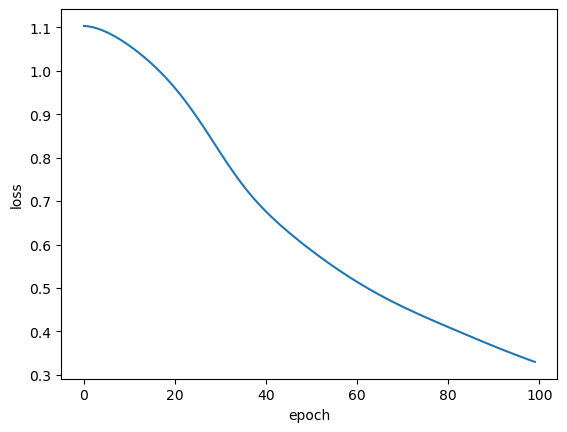

In [55]:
import matplotlib.pyplot as plt #python package to drew graphs in python

plt.plot([i for i in range(100)], [loss.detach().numpy() for loss in loss_arr])
plt.xlabel ('epoch')
plt.ylabel ('loss')
plt.show()

Evaluation the model:

In [56]:
preds = [] #predictions are stored in the preds array
with torch.no_grad(): #there’s no need to update weights and biases
    for val in X_test:
        y_hat = model.forward(val)
        preds.append(y_hat.argmax().item())

In [57]:
df = pd.DataFrame({'Y': y_test, 'YHat': preds}) #Y: actual value and YHat: predicted value
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]

In [58]:
df

,Y,YHat,Correct
0,1,2,0
1,0,0,1
2,1,1,1
3,2,2,1
4,2,2,1
5,1,2,0
6,1,1,1
7,0,0,1
8,2,2,1
9,1,1,1


In [59]:
df['Correct'].sum() / len(df) #sum up the Correct column and divide it with the length of df

0.8333333333333334

In [60]:
#another way
acc = len([1 for i in range(X_test.shape[0]) if preds[i] == y_test[i]]) / X_test.shape[0]
print("accuracy for test set is:{}".format(acc))

accuracy for test set is:0.8333333333333334


### Choosing Adam optimizer:

Defining the Deep Neural Network Model:

In [61]:
import torch.nn as nn
import torch.nn.functional as F

#defining the Hyper parameters
learning_rate = 0.01 #the standard learning rate value = 0.1 is adapted
learning_momentum = 0.9 #how fast you want the network to reach the minimum loss during the training process
epochs = 100 #this number denoted how many times you want the network to backpropagte and learn the data perfectly since there are only 150 rows 20 epochs worked fine but as question asking us, I chose it 100

class IrisANN3 (nn.Module): #defining the nodes, layers, activation functions

    def __init__(self): 
        super (IrisANN3, self).__init__()
        
        self.input = nn.Linear(in_features = 4, out_features = 24) #Fully Connected Layer (4 input features (since there are 4 physical parameters the number of nodes in the input layer will be 4), 24 output features (the first hidden layer has 24 nodes as question asking us))
        self.fc1 = nn.Linear(in_features = 24, out_features = 24) #Fully Connected Layer (24 input features (number of output features from the previous layer), 24 output features (the second hidden layer has 24 nodes as question asking us)))
        self.fc2 = nn.Linear(in_features = 24, out_features = 24)
        self.output = nn.Linear(in_features = 24, out_features = 3) #Output Layer (24 input features (number of output features from the previous layer), 3 output features (since there are 3 class of species to be predicted the output is 3))
    
    def forward(self, X): #defining the forward class which depicts how the data flows in a forward path of a network
        out = F.relu(self.input(X)) #ReLU activation function is widely and populary used for such application
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.output(out)
        
        return out
    
model = IrisANN3() #Create the neural network model

Choosing the loss function:

In [62]:
criterion = nn.CrossEntropyLoss() #basically how we measure loss, we’ll use CrossEntropyLoss

Choosing Adam optimizer:

In [63]:
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate) #optimizer - Adam is used

Adam shows an error with momentum

Training the model again:

In [64]:
%%time
epochs = 100 #train the model for 100 epochs
loss_arr = []

for i in range(epochs):
    y_hat = model.forward(X_train)
    loss = criterion(y_hat, y_train)
    loss_arr.append(loss)
 
    if i % 10 == 0: 
        print(f'Epoch: {i} Loss: {loss}') #every 10 epochs we’ll output on which epoch are we and what’s the current loss
 
    optimizer.zero_grad() #backpropagation to updating of weights and biases in order to the model actually learn
    loss.backward()
    optimizer.step()
    
model.eval()

Epoch: 0 Loss: 1.1149022579193115
Epoch: 10 Loss: 0.5995610356330872
Epoch: 20 Loss: 0.31550055742263794
Epoch: 30 Loss: 0.10892707854509354
Epoch: 40 Loss: 0.030766595155000687
Epoch: 50 Loss: 0.015066486783325672
Epoch: 60 Loss: 0.009151612408459187
Epoch: 70 Loss: 0.006722389254719019
Epoch: 80 Loss: 0.005014447961002588
Epoch: 90 Loss: 0.0038028801791369915
Wall time: 81 ms


IrisANN3(
  (input): Linear(in_features=4, out_features=24, bias=True)
  (fc1): Linear(in_features=24, out_features=24, bias=True)
  (fc2): Linear(in_features=24, out_features=24, bias=True)
  (output): Linear(in_features=24, out_features=3, bias=True)
)

A visualization of our loss by Adam optimizer:

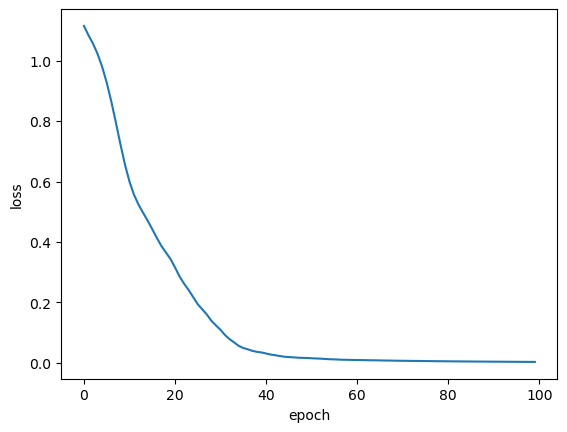

In [65]:
plt.plot([i for i in range(100)], [loss.detach().numpy() for loss in loss_arr])
plt.xlabel ('epoch')
plt.ylabel ('loss')
plt.show()

Evaluation the model:

In [66]:
preds = [] #predictions are stored in the preds array
with torch.no_grad(): #there’s no need to update weights and biases
    for val in X_test:
        y_hat = model.forward(val)
        preds.append(y_hat.argmax().item())

In [67]:
df = pd.DataFrame({'Y': y_test, 'YHat': preds}) #Y: actual value and YHat: predicted value
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]

In [68]:
df

,Y,YHat,Correct
0,1,1,1
1,0,0,1
2,1,1,1
3,2,2,1
4,2,2,1
5,1,2,0
6,1,1,1
7,0,0,1
8,2,2,1
9,1,1,1


In [69]:
df['Correct'].sum() / len(df) #sum up the Correct column and divide it with the length of df

0.9

In [70]:
#another way
acc = len([1 for i in range(X_test.shape[0]) if preds[i] == y_test[i]]) / X_test.shape[0]
print("accuracy for test set is:{}".format(acc))

accuracy for test set is:0.9
